# Python Part For Future Intern task 1

### Import Libraries & Load data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Sample - Superstore.csv", encoding='latin1')

### Checking Top-5 Rows of the data

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Checking the No. of Rows & Columns

In [9]:
df.shape

(9994, 21)

### Cleaning Columns

In [12]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("-", "_")
)

df.columns


Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

### Changing Data Types of columns

In [13]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%m/%d/%Y')
df['ship_date']  = pd.to_datetime(df['ship_date'],  format='%m/%d/%Y')


In [14]:
df[['order_date', 'ship_date']].head()


,order_date,ship_date
0,2016-11-08,2016-11-11
1,2016-11-08,2016-11-11
2,2016-06-12,2016-06-16
3,2015-10-11,2015-10-18
4,2015-10-11,2015-10-18


In [15]:
num_cols = ['sales', 'profit', 'discount', 'quantity']
df[num_cols] = df[num_cols].apply(pd.to_numeric)


In [16]:
df[num_cols].describe()


,sales,profit,discount,quantity
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,28.656896,0.156203,3.789574
std,623.245101,234.260108,0.206452,2.225110
min,0.444000,-6599.978000,0.000000,1.000000
25%,17.280000,1.728750,0.000000,2.000000
50%,54.490000,8.666500,0.200000,3.000000
75%,209.940000,29.364000,0.200000,5.000000
max,22638.480000,8399.976000,0.800000,14.000000


In [17]:
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month
df['order_month_name'] = df['order_date'].dt.month_name()


## EDA (Solving Business questions)

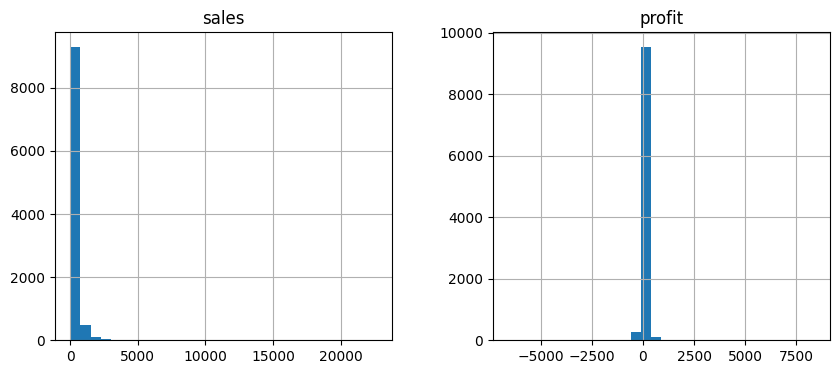

In [18]:
df[["sales","profit"]].hist(bins=30,figsize=(10,4))
plt.show()

In [19]:
df["discount"].value_counts().sort_index()

,count
discount,
0.00,4798
0.10,94
0.15,52
0.20,3657
0.30,227
0.32,27
0.40,206
0.45,11
0.50,66


In [20]:
df["order_year"].value_counts().sort_index()

,count
order_year,
2014,1993
2015,2102
2016,2587
2017,3312


### Important KPIs

In [26]:
total_sales = df["sales"].sum()
total_profit = df["profit"].sum()
profit_margin = total_profit / total_sales
print("Total Sales",total_sales)
print("Total Profit",total_profit)
/print("Profit Margin",profit_margin)

Total Sales 2297200.8603000003
Total Profit 286397.0217
Profit Margin 0.12467217240315603


### Yearly Trends with visualization

In [27]:
yearly_trend = df.groupby("order_year")["sales"].sum()
yearly_trend

,sales
order_year,
2014,484247.4981
2015,470532.5090
2016,609205.5980
2017,733215.2552


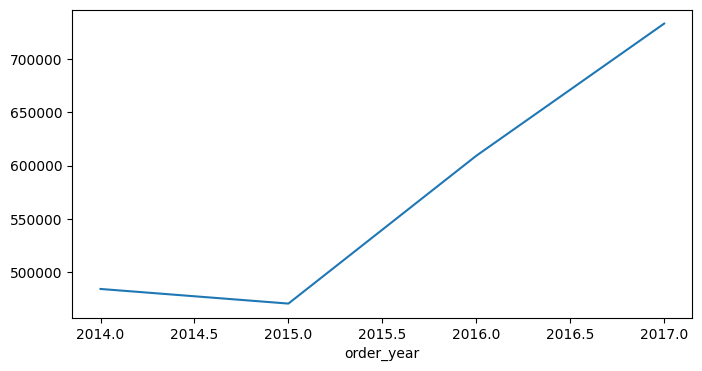

In [28]:
yearly_trend.plot(kind = "line",figsize=(8,4))
plt.show()

### Category by Sales & Profit

In [30]:
category_pef= (df.groupby("category")[["sales","profit"]]
               .sum()
               .sort_values(by= "sales", ascending = False)
               )
category_pef

,sales,profit
category,,
Technology,836154.0330,145454.9481
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008


### Sub-category by Sales & Profit

In [31]:
subcat_perf = (
    df.groupby('sub_category')[['sales', 'profit']]
      .sum()
      .sort_values(by='profit', ascending=False)
)
subcat_perf

subcat_perf[subcat_perf['profit'] < 0]


,sales,profit
sub_category,,
Supplies,46673.5380,-1189.0995
Bookcases,114879.9963,-3472.5560
Tables,206965.5320,-17725.4811


### Region by Sales & Profit

In [32]:
region_perf = (
    df.groupby('region')[['sales', 'profit']]
      .sum()
      .sort_values(by='sales', ascending=False)
)
region_perf



,sales,profit
region,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
Central,501239.8908,39706.3625
South,391721.9050,46749.4303


### Profit by Discount with visualization

In [33]:
discount_analysis = (
    df.groupby('discount')['profit']
      .mean()
      .reset_index()
)
discount_analysis



,discount,profit
0,0.00,66.900292
1,0.10,96.055074
2,0.15,27.288298
3,0.20,24.702572
4,0.30,-45.679636
5,0.32,-88.560656
6,0.40,-111.927429
7,0.45,-226.646464
8,0.50,-310.703456
9,0.60,-43.077212


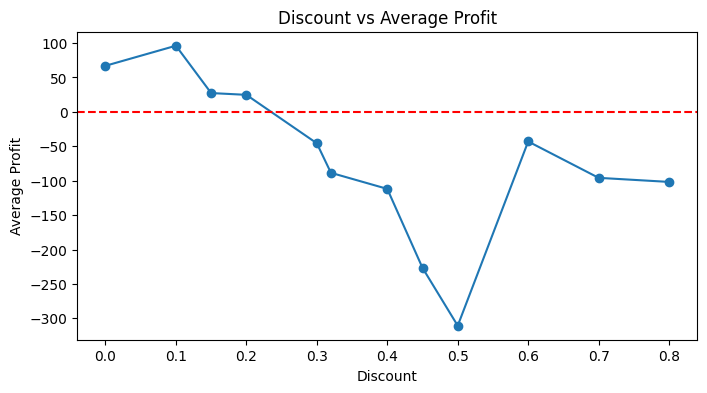

In [34]:
plt.figure(figsize=(8,4))
plt.plot(discount_analysis['discount'], discount_analysis['profit'], marker='o')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Discount')
plt.ylabel('Average Profit')
plt.title('Discount vs Average Profit')
plt.show()


### Segment By Sales & Profit

In [35]:
segment_perf = (
    df.groupby('segment')[['sales', 'profit']]
      .sum()
)
segment_perf


,sales,profit
segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


In [21]:
df.to_csv("superstore_clean.csv", index=False)


# Exporting Clean Data set for Power bi (Visualization) part

In [22]:
from google.colab import files
files.download("superstore_clean.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 📌 Key Insights from Business Sales Performance Analysis

## 1️⃣ Overall Business Performance

* The business generated ~2.29M
in total sales with a total profit of ~286K, resulting in an overall profit margin of ~12.5%.

* This indicates that the business is profitable overall, but there is significant scope for margin optimization.

## 2️⃣ Sales Trend Over Time

* Sales show a clear upward trend from 2014 to 2017, with strong growth in 2016 and 2017.

* A slight dip in 2015 was followed by consistent recovery and expansion, suggesting improving market performance and demand.

* The business appears to be in a growth phase, particularly in recent years.

## 3️⃣ Category-Level Performance

* Technology is the strongest category, contributing the highest sales and highest profit.

* Office Supplies shows stable and healthy profitability with moderate sales.

* Furniture generates high sales but contributes very low profit, indicating inefficient margins.

### 📌 Insight:
*High revenue does not always translate into high profitability.*

## 4️⃣ Sub-Category Analysis (Loss-Making Products)

* Certain sub-categories such as Tables, Bookcases, and Supplies are consistently loss-making.

* These products generate revenue but negatively impact overall profitability.

### 📌 Insight:
*These sub-categories require pricing review, discount control, or cost optimization.*

## 5️⃣ Regional Performance

* The West and East regions are the top-performing regions in terms of both sales and profit.

* The Central and South regions show relatively lower profitability despite reasonable sales volumes.

### 📌 Insight:
*Business expansion and marketing efforts should prioritize West and East regions, while Central and South regions need efficiency improvements.*

## 6️⃣ Impact of Discounting on Profit

* Orders with low or no discounts (0–20%) are generally profitable.

* Discounts above 30% consistently lead to negative average profit.

* Extremely high discounts (50%–80%) result in significant losses.

### 📌 Insight:
*Aggressive discounting is a major driver of profit erosion and should be tightly controlled.*

## 7️⃣ Customer Segment Performance

* The Consumer segment contributes the highest share of both sales and profit.

* The Corporate segment provides stable profitability with moderate sales.

* The Home Office segment contributes the least to overall performance.

### 📌 Insight:
*Customer acquisition and retention strategies should primarily focus on Consumer and Corporate segments.*

## 8️⃣ Strategic Business Recommendations (Derived from Analysis)

* Focus growth initiatives on Technology products and high-performing regions (West & East).

* Re-evaluate Furniture category pricing and cost structure to improve margins.

* Restrict high-discount strategies, especially above 30%.

* Review or restructure loss-making sub-categories to reduce profit leakage.

* Strengthen engagement with high-value customer segments.

# ✅ Final Conclusion

* The analysis successfully identifies key revenue drivers, profit leakages, and growth opportunities.

* Data-driven insights from this EDA can directly support strategic decision-making related to pricing, product focus, regional expansion, and discount policies.